Problem statement: You have been hired as a consultant to a start-up that is running a targetted marketing ads on facebook. The company wants to analyze customer behaviour by predicting which customer click on the advertisement. Customer data is as follows:

Inputs:
-Name
-E-mail
-Country
-Time on Facebook
-Estimated Salary (derived from other parameters)

Outputs:
-Clickk (1: customer clicked on Ad, 0: Customer did not click on the Ad)

Step 0: Libraries import

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Step 1: Import dataset

In [19]:
training_set = pd.read_csv('Facebook_Ads_2.csv', encoding ='ISO-8859-1')
training_set.head()

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0


Step 2: Explore/visualize dataset

In [20]:
click = training_set[training_set['Clicked'] == 1]  # customer has clicked on the add
no_click = training_set[training_set['Clicked'] == 0]  # customer hasn't clicked on the add

In [21]:
click

,Names,emails,Country,Time Spent on Site,Salary,Clicked
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
5,Carla Hester,mi@Aliquamerat.edu,Liberia,52.009946,80642.65222,1
6,Griffin Rivera,vehicula@at.co.uk,Syria,42.881370,61908.39815,1
8,Marny Obrien,Phasellus@sedsemegestas.org,Armenia,40.698233,34281.11878,1
...,...,...,...,...,...,...
486,Cheryl,iaculis.enim@nislelementum.edu,Indonesia,41.544304,55792.69851,1
487,Courtney,porttitor.tellus@elitelit.org,Malaysia,43.281586,54123.64650,1
490,Jonah,augue@risusNuncac.co.uk,Myanmar,34.828303,50151.32622,1
491,Merrill,dolor.sit@turpisIn.com,Egypt,37.173216,63750.41558,1


In [22]:
print('Total = ', len(training_set))
print('Number of customers who clicked', len(click))
print('Number of customers who did not clicked', len(no_click))

Total =  499
Number of customers who clicked 250
Number of customers who did not clicked 249


<Axes: xlabel='Time Spent on Site', ylabel='Salary'>

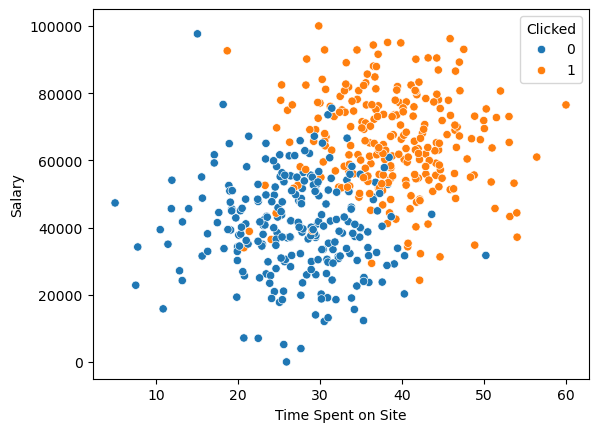

In [23]:
sns.scatterplot(x = training_set['Time Spent on Site'], y = training_set['Salary'], hue = training_set['Clicked'])

<Axes: xlabel='Clicked', ylabel='Salary'>

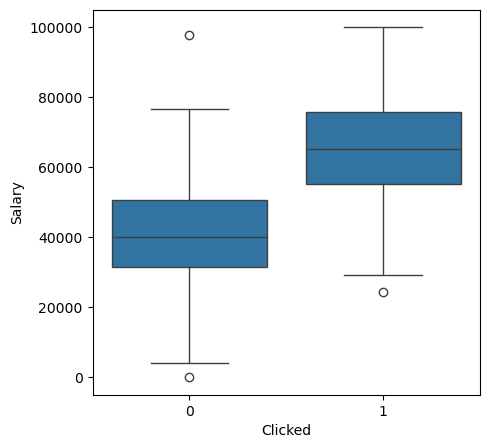

In [24]:
plt.figure(figsize = (5, 5))
sns.boxplot(x = 'Clicked', y = 'Salary', data = training_set)

<Axes: xlabel='Clicked', ylabel='Time Spent on Site'>

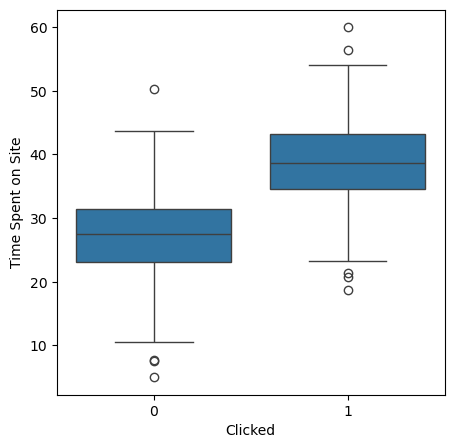

In [25]:
plt.figure(figsize = (5, 5))
sns.boxplot(x = 'Clicked', y = 'Time Spent on Site', data = training_set)

<Axes: >

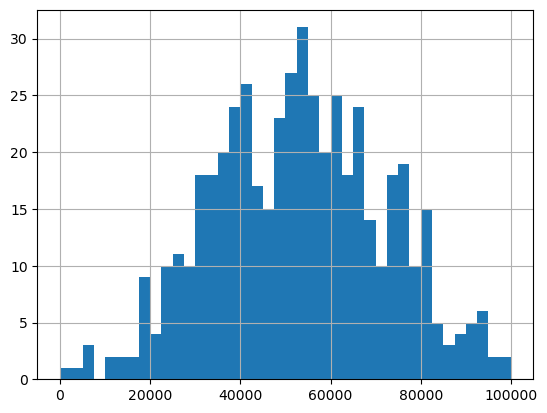

In [27]:
training_set['Salary'].hist(bins = 40) # histogram

<Axes: >

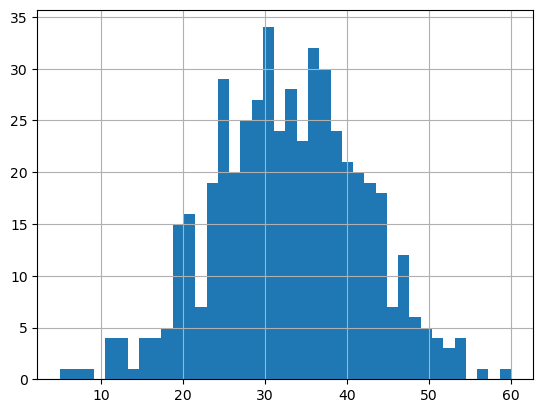

In [28]:
training_set['Time Spent on Site'].hist(bins = 40) # histogram

Step 3: Preparing the data for training/data cleaning

In [29]:
training_set

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0
...,...,...,...,...,...,...
494,Rigel,egestas.blandit.Nam@semvitaealiquam.com,Sao Tome and Principe,19.222746,44969.13495,0
495,Walter,ligula@Cumsociis.ca,Nepal,22.665662,41686.20425,0
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,35.320239,23989.80864,0
497,Pearl,penatibus.et@massanonante.com,Philippines,26.539170,31708.57054,0


In [39]:
training_set.drop(['Names', 'emails', 'Country'], axis = 1, inplace = True) # inplace = True schimba si in memorie tabelul, nu doar la printare

KeyError: "['Names', 'emails', 'Country'] not found in axis"

In [40]:
x = training_set.drop('Clicked', axis = 1).values

In [41]:
y = training_set['Clicked'].values

In [43]:
x.shape 

(499, 2)

In [46]:
type(x)

numpy.ndarray

In [48]:
y

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,

In [51]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = sc.fit_transform(x)

x

array([[-7.99457658e-01,  1.28257713e-01],
       [-5.10286870e-02,  1.37859159e+00],
       [-1.31666684e+00, -6.21944817e-01],
       [ 2.32223270e+00, -8.30443624e-01],
       [ 1.46195572e-01, -8.19280959e-01],
       [ 2.09908496e+00,  1.46259598e+00],
       [ 1.09531908e+00,  4.75030899e-01],
       [-7.96458904e-01, -1.21483411e+00],
       [ 8.55264296e-01, -9.81324726e-01],
       [-3.55476114e-01, -6.21930555e-01],
       [ 3.87487311e-02,  6.48400206e-02],
       [ 1.77112538e-01, -1.19530208e+00],
       [-8.36398567e-01, -4.81440402e-01],
       [ 1.49769499e+00, -2.23166322e-01],
       [ 5.27406027e-01,  6.21976462e-01],
       [-8.64648371e-01, -1.85222918e+00],
       [ 8.98997888e-01, -1.81000774e-01],
       [-8.97110238e-01, -7.59750031e-01],
       [ 1.75384005e+00, -9.55319376e-01],
       [-5.59287751e-01, -6.60247498e-02],
       [-1.73917217e+00,  4.62029789e-01],
       [-8.05159264e-01,  3.86803184e-02],
       [ 1.02580543e+00, -1.09023371e+00],
       [ 4.

Step 4: Model training

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [54]:
x_train.shape

(399, 2)

In [55]:
x_test.shape

(100, 2)

In [56]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

Step 5: Model Testing

In [57]:
y_predict_train = classifier.predict(x_train)

In [ ]:
y_predict_train # model prediction durring training

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,

<Axes: >

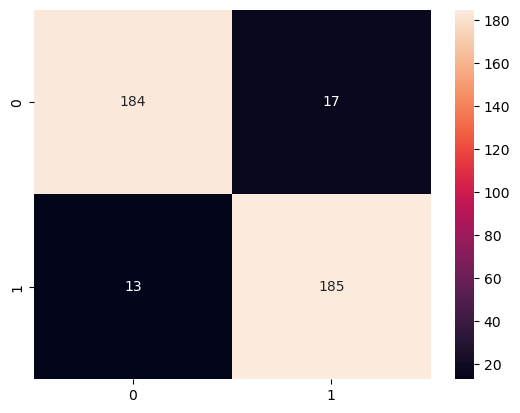

In [60]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot = True, fmt = 'd')

In [61]:
y_predict_test = classifier.predict(x_test)

In [62]:
y_predict_test

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1], dtype=int64)

In [ ]:
y_test # ground truth

array([1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1], dtype=int64)

<Axes: >

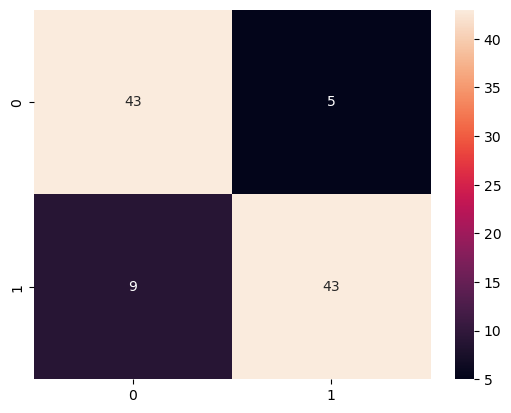

In [65]:
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True, fmt = 'd')

In [66]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86        48
           1       0.90      0.83      0.86        52

    accuracy                           0.86       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.86      0.86      0.86       100



Step 6: Model Testing Visualization

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10728\1787073226.py:21: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(['magenta', 'blue'])(i), label = j)


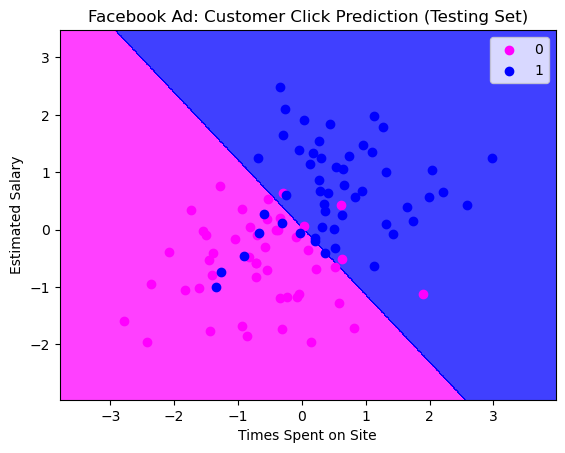

In [90]:
from matplotlib.colors import ListedColormap

x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(
    np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
    np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01)
)

plt.contourf(
    x1, 
    x2, 
    classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), 
    alpha=0.75, 
    cmap=ListedColormap(['magenta', 'blue'])
)

plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(['magenta', 'blue'])(i), label = j)
plt.title('Facebook Ad: Customer Click Prediction (Testing Set)')
plt.xlabel('Times Spent on Site')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()